In [1]:
import pandas as pd

In [94]:
import matplotlib
%matplotlib inline

In [95]:
import seaborn as sns

# Test Public

In [2]:
public_test_df = pd.read_csv('data/test-public.txt', sep='\t')
public_test_df.head()

,Id,Source,Sink
0,1,2184483,1300190
1,2,3151356,1452193
2,3,1579396,193159
3,4,1406432,2481036
4,5,2389638,593017


In [3]:
public_test_df.describe()

,Id,Source,Sink
count,2000.000000,2.000000e+03,2.000000e+03
mean,1000.500000,2.431106e+06,2.429986e+06
std,577.494589,1.418827e+06,1.420581e+06
min,1.000000,1.452000e+03,5.113000e+03
25%,500.750000,1.202666e+06,1.162797e+06
50%,1000.500000,2.456928e+06,2.459976e+06
75%,1500.250000,3.655393e+06,3.679264e+06
max,2000.000000,4.866498e+06,4.864558e+06


In [4]:
public_test_df.Sink.value_counts().head(10)

212805     3
314924     2
4743804    2
4595137    2
4132261    2
163021     2
2516690    2
621120     2
4096612    2
4254453    2
Name: Sink, dtype: int64

In [5]:
source_set = set(public_test_df.Source.values)
sink_set = set(public_test_df.Sink.values)
len(sink_set), len(source_set), len(source_set.intersection(sink_set))

(1978, 2000, 30)

In [30]:
len(source_set.intersection(sink_set))

30

In [31]:
test_set = source_set.union(sink_set)

# Train

In [69]:
node_child_counts = {}
node_child_sets = {}
items = []
with open('data/train.txt', 'rt') as f:
    line = f.readline()
    while line:
        numbers = line.split('\t')
        source = int(numbers[0])
        node_child_counts[source] = len(numbers)-1
        node_child_sets[source] = set(numbers[1:])
        for sink in numbers[1:]:
            items.append((source, int(sink))) 
        line = f.readline()
len(items)

24004361

In [70]:
data = pd.DataFrame(items, columns=['Source', 'Sink'])
del items

In [71]:
data.shape

(24004361, 2)

In [72]:
mask = data.Source.isin(test_set) | data.Sink.isin(test_set)
data = data[mask]
mask.sum()

5068485

In [73]:
data.head()

,Source,Sink
0,4066935,1272125
1,4066935,3105725
2,4066935,2828522
3,4066935,4394015
4,4066935,2367409


In [74]:
data['is_train_set'] = 1
data['Id'] = range(2001, 2001 + data.shape[0], 1)

In [75]:
public_test_df['is_train_set'] = 0

In [76]:
df = pd.concat([public_test_df, data], axis=0)

In [77]:
df.head()

,Id,Sink,Source,is_train_set
0,1,1300190,2184483,0
1,2,1452193,3151356,0
2,3,193159,1579396,0
3,4,2481036,1406432,0
4,5,593017,2389638,0


In [88]:
child_count = lambda x: node_child_counts[x] if x in node_child_counts.keys() else 0
df['source_childs_count'] = df.Source.apply(child_count).clip(upper=1000)
df['sink_childs_count'] = df.Sink.apply(child_count).clip(upper=1000)

In [89]:
def intersect(vector):
    if vector['Sink'] not in node_child_sets.keys():
        return 0
    set1 = node_child_sets[vector['Source']]
    set2 = node_child_sets[vector['Sink']] 
    return len(set1.intersection(set2))
df['source_sink_child_intersect_count'] = df.apply(intersect, axis=1)

In [90]:
df[df.source_childs_count > 0]

,Id,Sink,Source,is_train_set,source_childs_count,sink_childs_count,source_sink_child_intersect_count
0,1,1300190,2184483,0,83,0,0
1,2,1452193,3151356,0,340,0,0
2,3,193159,1579396,0,208,0,0
3,4,2481036,1406432,0,84,14,5
4,5,593017,2389638,0,267,58,5
5,6,212805,228206,0,9,297,7
6,7,879115,1237964,0,15,0,0
7,8,1840575,3318124,0,93,0,0
8,9,1552625,4522929,0,422,0,0
9,10,3781412,3406737,0,29,0,0


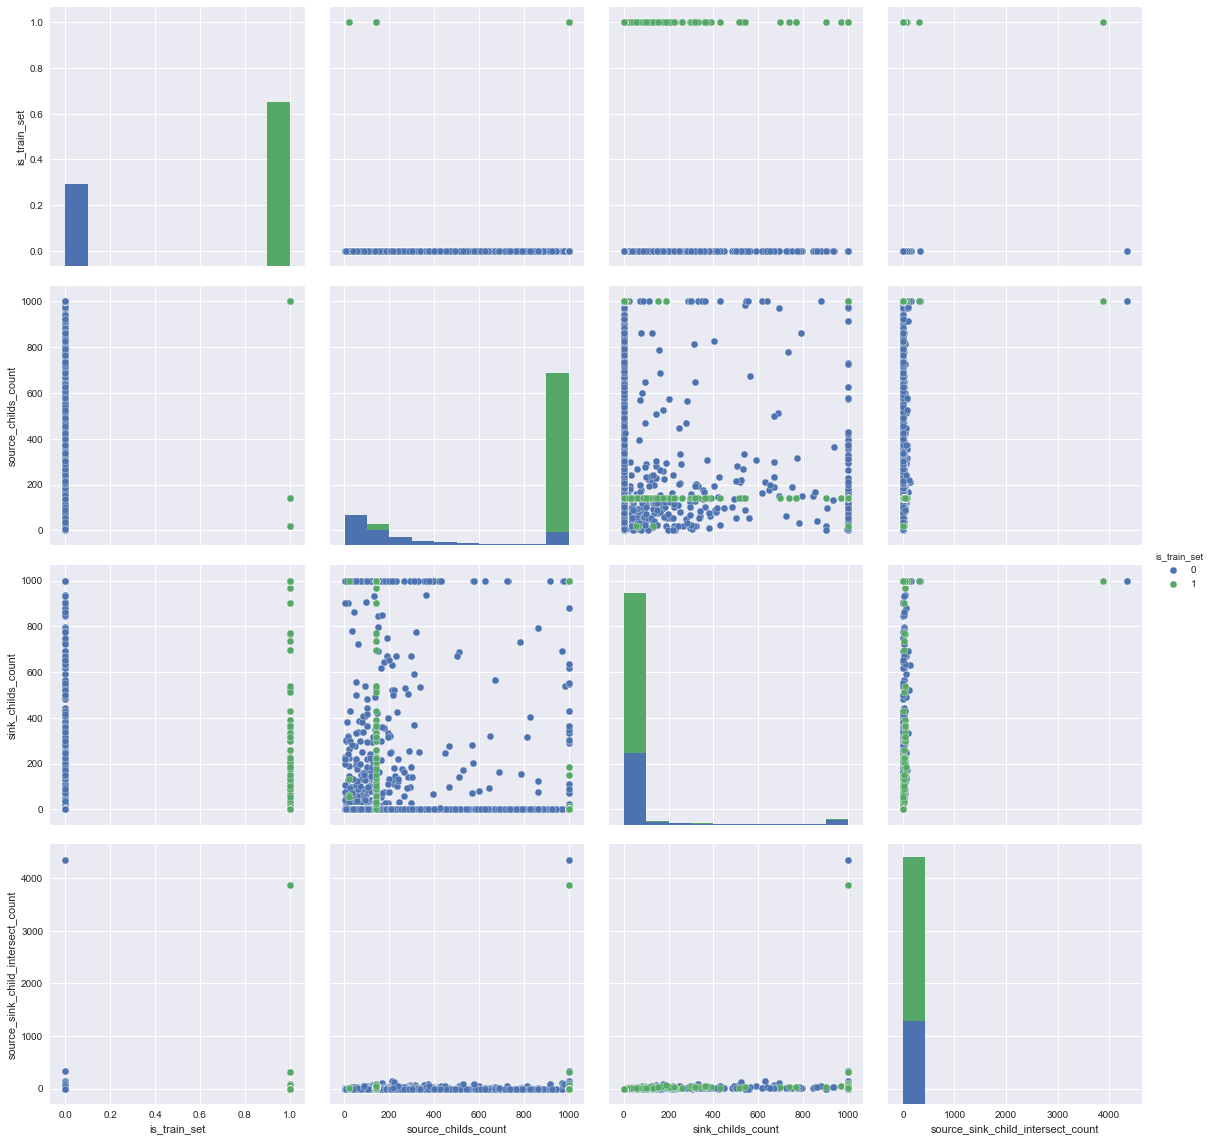

In [104]:
sns.pairplot(df.ix[:4000, 3:], hue='is_train_set', size=4)

In [17]:
data.sink.value_counts().head()

20388      4841
2740141    4637
1054633    3654
487639     3432
2120801    3425
Name: sink, dtype: int64

In [18]:
data.source.value_counts().head()

20388      764195
1763327    511816
1403971    422106
2809458    414420
4096612    383713
Name: source, dtype: int64

Intersection of source nodes Kaggge Test Set and Train Data Source Node Set

In [14]:
len(source_set.intersection(set(data.source.values)))

2000

In [15]:
len(sink_set.intersection(set(data.sink.values)))

1978

In [19]:
public_test_df.head()

,Id,Source,Sink
0,1,2184483,1300190
1,2,3151356,1452193
2,3,1579396,193159
3,4,1406432,2481036
4,5,2389638,593017


In [21]:
df = data.source

In [23]:
df.dropna()

,source,sink,Id


In [29]:
len(set(data.source.values).intersection(set(data.sink.values)))

19570

In [27]:
data.groupby('source')['sink'].count()

source
1097        176
1122       1012
1152       2777
1170        452
1174        542
1392       1420
1399        250
1452        182
1598         40
2048        149
2393        212
3144         75
3203          2
3642        131
3758        122
3838       1296
3842         12
4055        165
4185         17
4276        156
4293        126
4676          9
4910         66
5054         12
5089       1010
5221        432
5322         34
5336        162
5356        204
5607          9
           ... 
4859575      80
4859682     404
4860122    2239
4860180     110
4860911       2
4860976     184
4861070       5
4861279     333
4861408      15
4861782      95
4862131     229
4862401      33
4862682      33
4863166     310
4863182    1014
4863493     359
4863721      90
4863913     295
4864020    1241
4864733     631
4864836      86
4865292     122
4865515       2
4865891     419
4865926      41
4865997     320
4866060    2162
4866498    1685
4866627     174
4867046     148
Name: sink, Lengt

# Predictions

In [112]:
predictions = pd.read_csv('data/sample.csv')
predictions['Prediction'] = 0

In [113]:
predictions.to_csv('prediction.csv', index=False)

In [126]:
df['prediction'] = (df['source_childs_count'] > 2).astype(int)
df[df.Id <= 2000][['Id', 'prediction']].to_csv('prediction.csv', index=False)